In [ ]:
%pip install numpy panadas matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
## load the data

data = pd.read_csv("../assets/Student_Performance.csv")
X_raw = data.iloc[:,-2]
Y_raw = data.iloc[:,-6]

Xmin = min(X_raw)
Xmax= max(X_raw)

Ymin = min(Y_raw)
Ymax = max(Y_raw)
print(f"min value {Xmin} max value is {Xmax}")
print(f"min value {Ymin} max value is {Ymax}")


min value 35.22 max value is 95.64
min value 7.08 max value is 100.0


In [59]:
##scalling the data bcz salary in 10000-100000 and experience is in 1-10
## for scalling we use mean and std deviation
X_mean = X_raw.mean()
X_std = X_raw.std()

Y_mean = Y_raw.mean()
Y_std = Y_raw.std()

## value of X and Y after scalling 

X = (X_raw- X_mean)/X_std
Y = (Y_raw- Y_mean)/Y_std

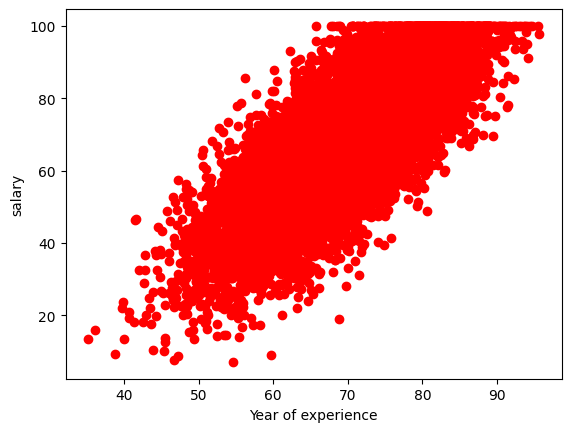

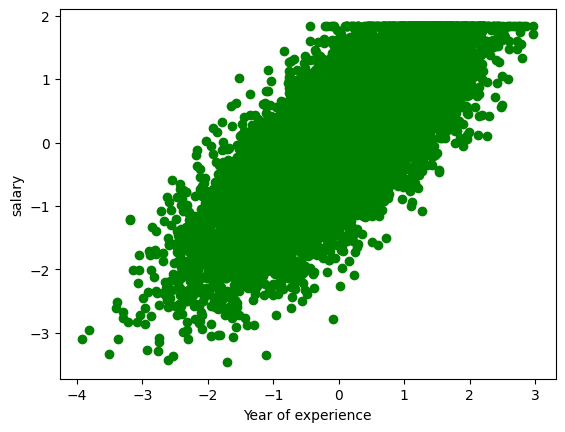

In [60]:
##raw data graph
plt.scatter(X_raw,Y_raw,color ="red",label="raw data")
plt.xlabel("Year of experience")
plt.ylabel("salary")
plt.show()

## scaled data graph
plt.scatter(X,Y,color ="green",label="scalled data")
plt.xlabel("Year of experience")
plt.ylabel("salary")
plt.show()

In [61]:
## our hyopthesis function is pre_y = w0+w1X

## intialize the value 

W0 = 0 ##assume this is the best fit line interscept
W1 = -5  # assume this is the best fit line slope
alpha = 0.001 ##learing rate
tolerance = 1e-6 ##tolerence
epoch = 0 ## checking how many time loop run

slope = [] ## storing each slop 
slope.append(W1)
intercept=[] ## storing each intercept
intercept.append(W0)

previous_cost = float('inf') 
cost_history = [] ##store the costinto this to plot further graph

m = len(Y)



while True:
    pre_Y = W0+W1*X ## predict new value based on that wo and w1

    cost = (1/(2*m))*np.sum(np.square(pre_Y-Y)) ## calculating the cost at that  w0 and w1
    cost_history.append(cost) ## storing the cost into cost history
    if abs(previous_cost - cost) <=tolerance: ## breaking the loop if diff is tending to zero
      break
    
    previous_cost = cost

    epoch= epoch+1

    ##updating the w0 and w1
    error = pre_Y-Y
    W0 = W0-(alpha/m)*(np.sum(error))   
    W1 = W1-(alpha/m)*(np.sum(X*error))
    slope.append(W1)
    intercept.append(W0)

print(f"Final W0: {W0}, Final W1: {W1}")

Final W0: -1.1864836224617643e-15, Final W1: 0.7394808472350669


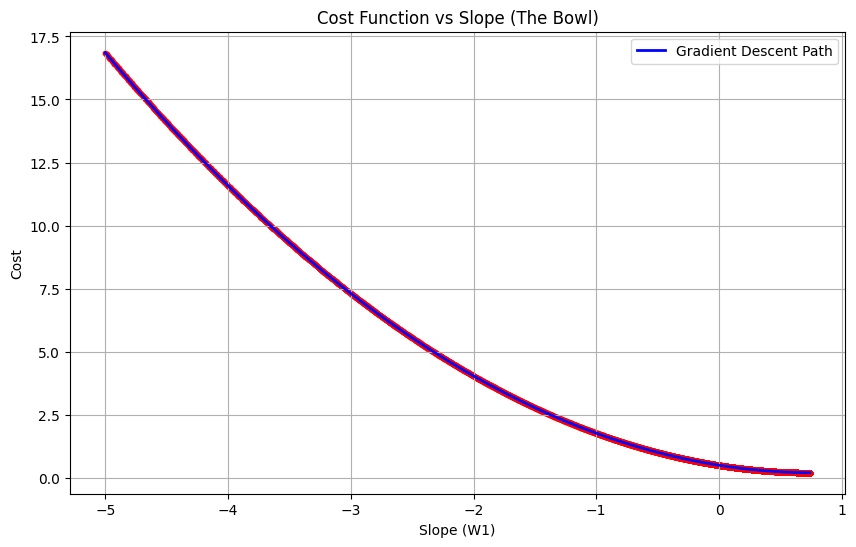

In [62]:
plt.figure(figsize=(10,6))
plt.plot(slope, cost_history, color="blue", linewidth=2, label="Gradient Descent Path")
plt.scatter(slope, cost_history, color="red", s=10) # Show individual steps
plt.xlabel("Slope (W1)")
plt.ylabel("Cost")
plt.title("Cost Function vs Slope (The Bowl)")
plt.legend()
plt.grid(True)
plt.show()

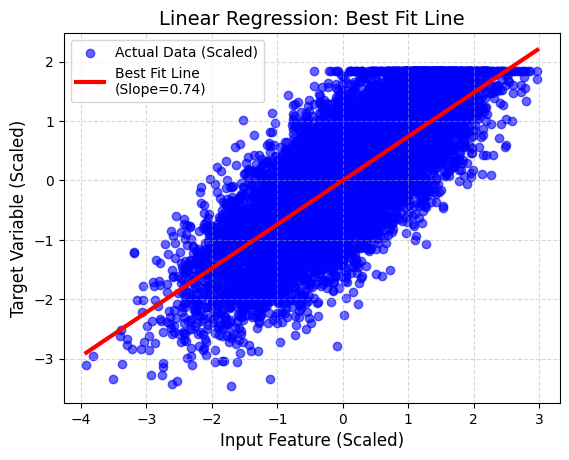

In [63]:
# 1. Plot the Scatter Points (The Blue Dots)
plt.scatter(X, Y, color='blue', alpha=0.6, label='Actual Data (Scaled)')

# 2. Draw the Best Fit Line (The Red Line)
# We calculate the line's Y values using your learned W0 and W1
x_line = np.linspace(X.min(), X.max(), 100) # Create a range of X values
y_line = W0 + W1 * x_line                    # The Equation: y = c + mx

plt.plot(x_line, y_line, color='red', linewidth=3, label=f'Best Fit Line\n(Slope={W1:.2f})')

# 3. Add Labels and Titles
plt.title("Linear Regression: Best Fit Line", fontsize=14)
plt.xlabel("Input Feature (Scaled)", fontsize=12)
plt.ylabel("Target Variable (Scaled)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# 4. Show the Plot
plt.show()

In [65]:
## checking the model 
new_inp = 70
input_scaled = (new_inp - X_raw.mean()) / X_raw.std()

##scaling the input year
prediction_scaled = W0 + W1 * input_scaled

##unscaling the salary
predicted_value = (prediction_scaled * Y_raw.std()) + Y_raw.mean()
print(predicted_value)

68.36104242941882
